# Empirical Temporal Networks

In [267]:
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Primaryschool

## Original

In [315]:
filename = "data/primaryschool.edges"
objname= "primaryschool"
STN = SubTempNet(filename, objname, directed= False, init = False)

In [288]:
print(STN)

filename =	data/primaryschool.edges
objname =	primaryschool_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846



In [310]:
d1 =STN["deg_seq"]

[1, 2, 3, 4, 5, 7, 8, 9, 11, 14, 16, 20, 24, 28, 34, 41, 49, 58, 69, 83, 99, 119, 142, 169, 202, 241, 288, 344, 410, 490, 585, 698, 834, 995, 1188, 1418, 1693, 2021, 2412, 2879, 3437, 4103, 4897, 5846]


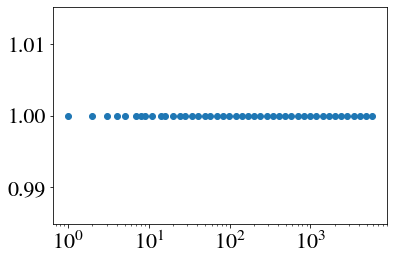

In [219]:
num = 50
T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [220]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 2, 3, 4, 5, 7, 8, 9, 11, 14, 16, 20, 24, 28, 34, 41, 49, 58, 69, 83, 99, 119, 142, 169, 202, 241, 288, 344, 410, 490, 585, 698, 834, 995, 1188, 1418, 1693, 2021, 2412, 2879, 3437, 4103, 4897]
Analyzing sample number 1 for samplelength  5846 and  8 slices


In [309]:
STN.save()

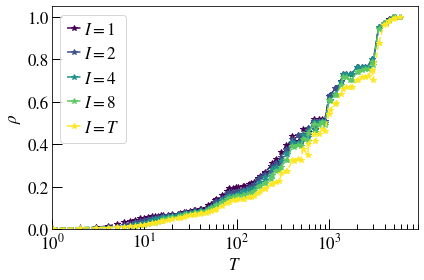

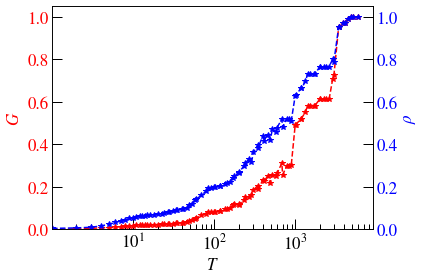

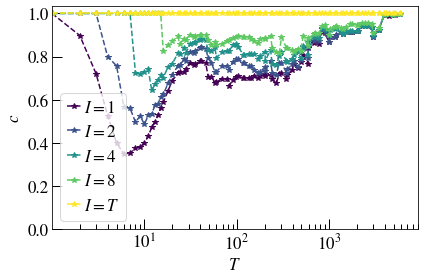

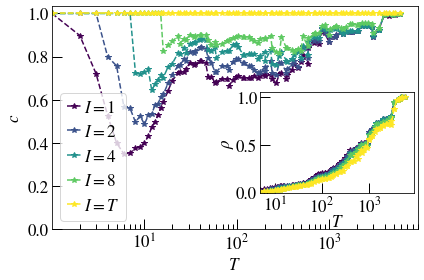

In [273]:
STN.plot_PA(save = "primaryschool_rho")
STN.plot_LCC(save = "primaryschool_G")
STN.plot_cA0AT(legend = True, save = "primaryschool_c")
STN.plot_cA0AT(legend = True, rho = True,save = "primaryschool_c_rho")

## EDS

In [316]:
#Create EDS Temporal network
name = "data/"+ STN["objname"][:-11]+"_EDS.edges"
deg = STN["deg_seq"]/STN["T"]
A = []
for t in range(int(1.5*STN["T"])):
    A.append(STN.ChungLu(deg))
#check that first and last snapshot contain at least one edge
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[-1].add_edge(u,v)
#save edgelist
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [322]:
filename = "data/primaryschool_EDS.edges"
objname= "primaryschool_EDS"
STN = SubTempNet(filename, objname, directed= False, init = False)

In [323]:
d2 =STN["deg_seq"] / 1.5

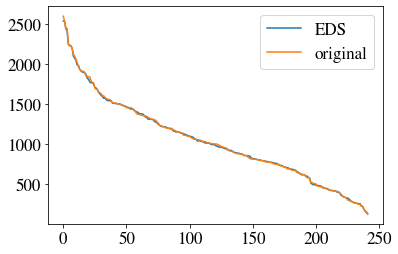

In [324]:
plt.plot(d2, label = "EDS")
plt.plot(d1, label = "original")
plt.legend()

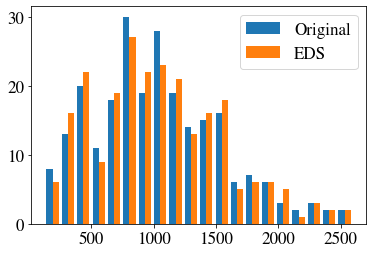

In [325]:
plt.hist([d1,d2],20, label = ["Original","EDS"])
plt.legend()

[1, 2, 3, 4, 5, 7, 8, 9, 11, 14, 16, 20, 24, 28, 34, 41, 49, 58, 69, 83, 99, 119, 142, 169, 202, 241, 288, 344, 410, 490, 585, 698, 834, 995, 1188, 1418, 1693, 2021, 2412, 2879, 3437, 4103, 4897, 5846]


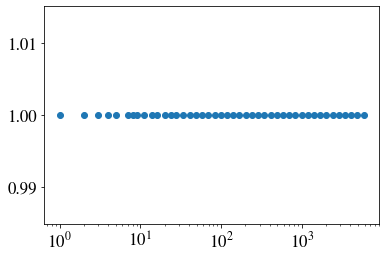

In [326]:
num = 50
T = sorted(list(set(np.logspace(np.log10(5846),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [ ]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 2, 3, 4, 5, 7, 8, 9, 11, 14, 16, 20, 24, 28, 34, 41, 49, 58, 69, 83, 99, 119, 142, 169]
Analyzing sample number 3 for samplelength  202 and  2 slices


In [ ]:
STN.save()

In [ ]:
STN.plot_PA()
STN.plot_LCC()
STN.plot_cA0AT()


# Highschool 2012

## Original

In [289]:
filename = "data/highschool2012.edges"
objname= "highschool2012"
STN = SubTempNet(filename, objname, directed= False, init = False)

In [290]:
d1 =STN["deg_seq"]

In [229]:
print(STN)

filename =	data/highschool2012.edges
objname =	highschool2012_SubTempNet
directed =	False
ncount = 	92
ecount = 	9827
T = 		49382



[1, 2, 3, 4, 5, 7, 9, 11, 14, 17, 21, 27, 34, 42, 52, 66, 82, 102, 128, 159, 199, 248, 309, 385, 480, 599, 747, 931, 1161, 1448, 1806, 2251, 2807, 3500, 4364, 5441, 6783, 8458, 10545, 13147, 16392, 20437, 25480, 31768, 39607, 49382]


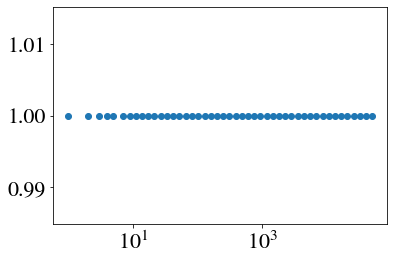

In [230]:
num = 50
T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [231]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 2, 3, 4, 5, 7, 9, 11, 14, 17, 21, 27, 34, 42, 52, 66, 82, 102, 128, 159, 199, 248, 309, 385, 480, 599, 747, 931, 1161, 1448, 1806, 2251, 2807, 3500, 4364, 5441, 6783, 8458, 10545, 13147, 16392, 20437, 25480, 31768, 39607]
Analyzing sample number 1 for samplelength  49382 and  8 slices


In [232]:
STN.save()

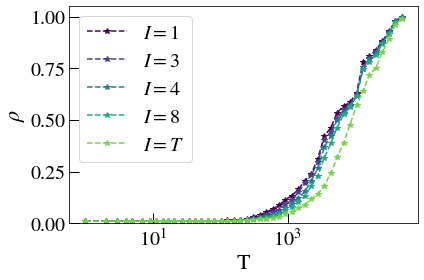

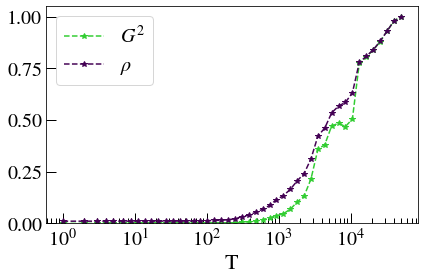

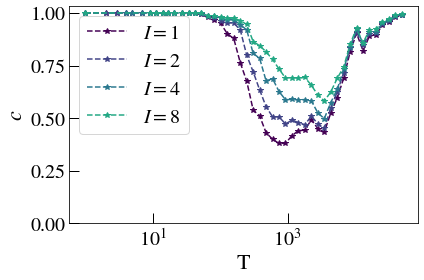

In [256]:
STN.plot_PA()
STN.plot_LCC()
STN.plot_cA0AT()

## EDS

In [234]:
#Create EDS Temporal network
name = "data/"+ STN["objname"][:-11]+"_EDS.edges"
deg = STN["deg_seq"]/STN["T"]
A = []
for t in range(int(1.5*STN["T"])):
    A.append(STN.ChungLu(deg))
#check that first and last snapshot contain at least one edge
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[-1].add_edge(u,v)
#save edgelist
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [291]:
filename = "data/highschool2012_EDS.edges"
objname= "highschool2012_EDS"
STN = SubTempNet(filename, objname, directed= False, init = False)

In [292]:
d2 =STN["deg_seq"] / 1.5

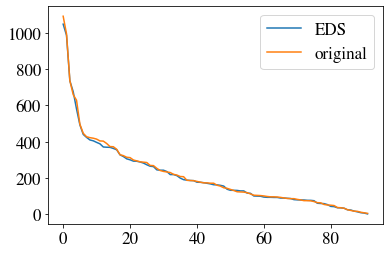

In [293]:
plt.plot(d2, label = "EDS")
plt.plot(d1, label = "original")
plt.legend()

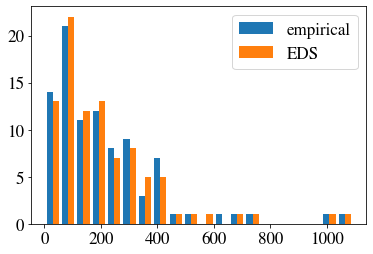

In [294]:
plt.hist([d1,d2],20, label = ["empirical","EDS"])
plt.legend()

In [236]:
STN.save()

In [237]:
print(STN)

filename =	data/highschool2012_EDS.edges
objname =	highschool2012_EDS_SubTempNet
directed =	False
ncount = 	92
ecount = 	14463
T = 		74073



[1, 2, 3, 4, 6, 7, 9, 12, 15, 19, 24, 30, 38, 48, 61, 77, 97, 122, 153, 193, 242, 305, 383, 482, 606, 762, 958, 1204, 1514, 1903, 2393, 3008, 3781, 4754, 5976, 7513, 9445, 11874, 14927, 18766, 23591, 29657, 37283, 46870, 58922, 74072]


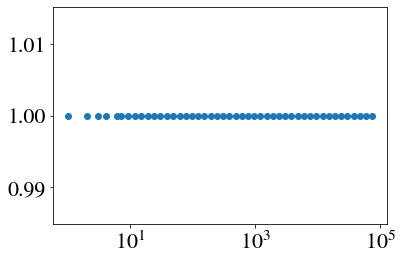

In [238]:
num = 50
T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [239]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 2, 3, 4, 6, 7, 9, 12, 15, 19, 24, 30, 38, 48, 61, 77, 97, 122, 153, 193, 242, 305, 383, 482, 606, 762, 958, 1204, 1514, 1903, 2393, 3008, 3781, 4754, 5976, 7513, 9445, 11874, 14927, 18766, 23591, 29657]
Analyzing sample number 4 for samplelength  37283 and  8 slices


In [240]:
STN.save()

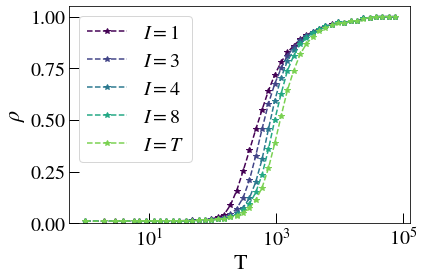

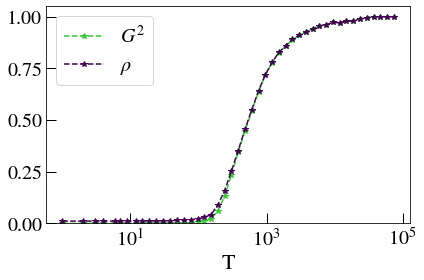

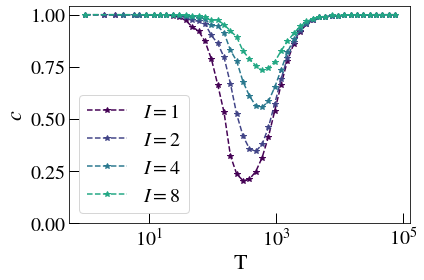

In [258]:
STN.plot_PA()
STN.plot_LCC()
STN.plot_cA0AT()

# LOTR

## Original

In [295]:
filename = "data/lotr.edges"
objname= "lotr"
STN = SubTempNet(filename, objname, directed= False, init = False)

In [183]:
print(STN)

filename =	data/lotr.edges
objname =	lotr_SubTempNet
directed =	False
ncount = 	139
ecount = 	2649
T = 		32642



In [296]:
d1 =STN["deg_seq"]

[1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 19, 24, 29, 36, 45, 56, 69, 85, 106, 131, 162, 200, 248, 307, 379, 469, 580, 717, 886, 1096, 1355, 1675, 2071, 2560, 3165, 3913, 4838, 5981, 7395, 9142, 11302, 13973, 17275, 21357, 26403, 32641]


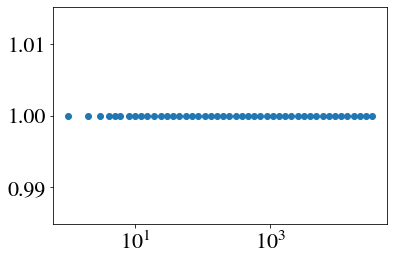

In [243]:
num = 50
T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [244]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 19, 24, 29, 36, 45, 56, 69, 85, 106, 131, 162, 200, 248, 307, 379, 469, 580, 717, 886, 1096, 1355, 1675, 2071, 2560, 3165, 3913, 4838, 5981, 7395, 9142, 11302, 13973, 17275, 21357, 26403]
Analyzing sample number 1 for samplelength  32641 and  8 slices


In [245]:
STN.save()

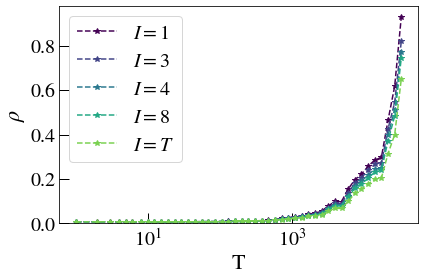

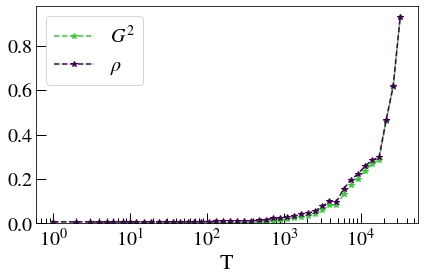

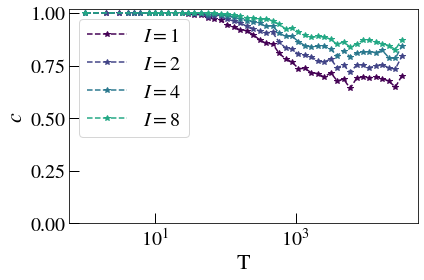

In [260]:
STN.plot_PA()
STN.plot_LCC()
STN.plot_cA0AT()

## EDS

In [192]:
#Create EDS Temporal network
name = "data/"+ STN["objname"][:-11]+"_EDS.edges"
deg = STN["deg_seq"]/STN["T"]
A = []
for t in range(int(1.5*STN["T"])):
    A.append(STN.ChungLu(deg))
#check that first and last snapshot contain at least one edge
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[-1].add_edge(u,v)
#save edgelist
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [297]:
filename = "data/lotr_EDS.edges"
objname= "lotr_EDS"
STN = SubTempNet(filename, objname, directed= False, init = False)

In [266]:
print(STN)

filename =	data/lotr_EDS.edges
objname =	lotr_EDS_SubTempNet
directed =	False
ncount = 	134
ecount = 	3853
T = 		48963



In [195]:
STN.save()

In [298]:
d2 = STN["deg_seq"] / 1.5

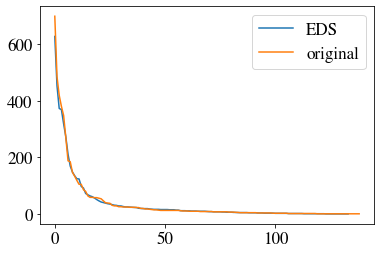

In [299]:
plt.plot(d2, label = "EDS")
plt.plot(d1, label = "original")
plt.legend()

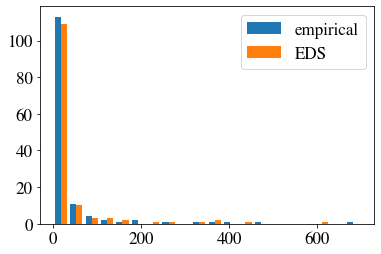

In [300]:
plt.hist([d1,d2],20, label = ["empirical","EDS"])
plt.legend()

In [141]:
np.mean(list(d2/d1)[:])

1.9809999960047766

[1, 2, 3, 4, 5, 7, 9, 11, 14, 17, 21, 27, 33, 42, 52, 65, 82, 102, 127, 158, 198, 247, 307, 383, 478, 596, 743, 926, 1155, 1440, 1795, 2238, 2790, 3477, 4335, 5404, 6736, 8397, 10468, 13049, 16267, 20277, 25277, 31509, 39278, 48962]


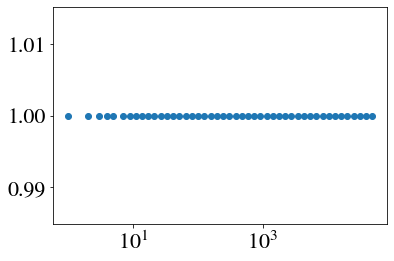

In [262]:
num = 50
T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [263]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 2, 3, 4, 5, 7, 9, 11, 14, 17, 21, 27, 33, 42, 52, 65, 82, 102, 127, 158, 198, 247, 307, 383, 478, 596, 743, 926, 1155, 1440, 1795, 2238, 2790, 3477, 4335, 5404, 6736, 8397, 10468, 13049, 16267, 20277, 25277, 31509, 39278]
Analyzing sample number 1 for samplelength  48962 and  8 slices


In [264]:
STN.save()

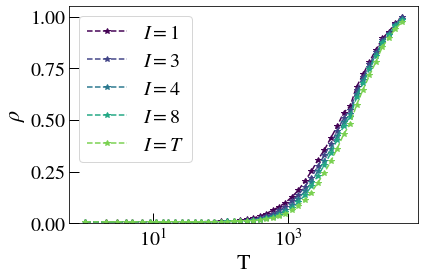

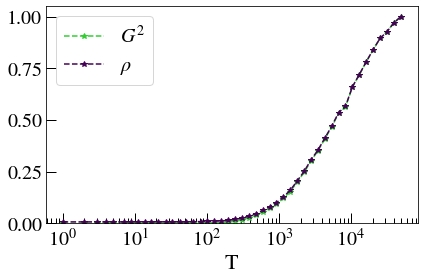

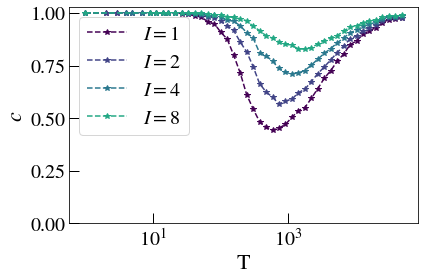

In [265]:
STN.plot_PA()
STN.plot_LCC()
STN.plot_cA0AT()